In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# 1-1. Fit the data using linear (1st order) regression model (matrix form, gradient descent method).
### Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).

In [2]:
data1 = pd.read_csv("ex2data1.csv")
X_1 = data1.as_matrix(columns=data1.columns[0:1])
Y_1 = data1.as_matrix(columns=data1.columns[1:])
X_1_coloumn_added = np.c_[np.ones((data1.shape[0], 1)), X_1]

In [3]:
def weight_optimizer(data,degree,Label,learn_rate = .01,epochs = 100000,regularisation_alpha=0):
    theta_1 = np.random.randn(degree+1,1)
    for epoch in range(epochs):
        gradients = (2/data.shape[0])* (data.T.dot(data.dot(theta_1)- Label)+regularisation_alpha*theta_1)
        theta_1 = theta_1 - learn_rate * gradients
    return theta_1

In [4]:
def rmse_calculator(data,weights,actual_label):
    predict_y = data.dot(weights)
    rms = sqrt(mean_squared_error(actual_label, predict_y))
    return rms

In [5]:
# Please input sorted data
def graph_plotter(X_1_poly_dn_scaled_coloumn_added,weights,actual_label,graph_label=None):
    X_1_poly_dn_scaled_coloumn_added_sorted = X_1_poly_dn_scaled_coloumn_added [X_1_poly_dn_scaled_coloumn_added [:,1].argsort()]
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], actual_label, 'bo')
    y_1_dn_plot = X_1_poly_dn_scaled_coloumn_added_sorted.dot(weights)
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], y_1_dn_plot,label=graph_label)
    legend = plt.legend(loc='upper right', shadow=True)

In [6]:
scaler = StandardScaler()

In [7]:
def polynomial_adder(data,degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_1_poly_dn = poly_features.fit_transform(data)
    X_1_poly_dn_scaled = scaler.fit_transform(X_1_poly_dn)
    X_1_poly_dn_scaled_coloumn_added = np.c_[np.ones((data.shape[0], 1)), X_1_poly_dn_scaled]
    ## Sorting for graph plotting
    #X_1_poly_dn_scaled_coloumn_added = X_1_poly_dn_scaled_coloumn_added [X_1_poly_dn_scaled_coloumn_added [:,1].argsort()]
    return X_1_poly_dn_scaled_coloumn_added

## Optimized Weight - Deg1


In [8]:
theta_1 = weight_optimizer(X_1_coloumn_added,1,Y_1)
print (theta_1)

[[ 1.07581132]
 [-1.1887203 ]]


## RMSE - Deg1


In [9]:
rms_1 = rmse_calculator(X_1_coloumn_added,theta_1,Y_1)
print (rms_1)

0.47624021947640577


## Plot - Deg1

No handles with labels found to put in legend.


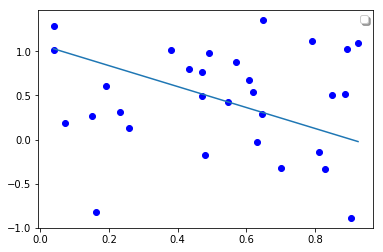

In [10]:
graph_plotter(X_1_coloumn_added,theta_1,Y_1)

# 1-2. Fit the data using 2nd order polynomial regression model (matrix form, gradient descent method).

In [11]:
X_1_poly_d2_scaled_coloumn_added = polynomial_adder(X_1,2)

## Optimized Weight - deg2

In [12]:
theta_1_d2 = weight_optimizer(X_1_poly_d2_scaled_coloumn_added,2,Y_1,epochs=1000000)
print (theta_1_d2)

[[ 0.45269151]
 [ 1.13735736]
 [-1.51236155]]


## RMSE

In [13]:
rms_1_d2 = rmse_calculator(X_1_poly_d2_scaled_coloumn_added,theta_1_d2,Y_1)
print (rms_1_d2)

0.2856992946970416


## Plot - deg2

No handles with labels found to put in legend.


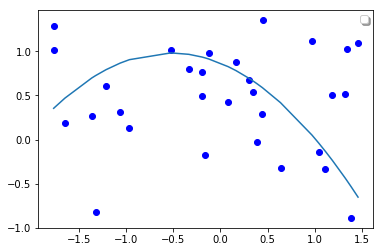

In [14]:
graph_plotter(X_1_poly_d2_scaled_coloumn_added,theta_1_d2,Y_1)

# 1-3. Fit the data using 4th order polynomial regression model (matrix form, gradient descent method).

In [15]:
X_1_poly_d4_scaled_coloumn_added = polynomial_adder(X_1,4)

## Optimized Weight - deg4

In [16]:
theta_1_d4 = weight_optimizer(X_1_poly_d4_scaled_coloumn_added,4,Y_1,epochs=1000000)
print (theta_1_d4)

[[ 0.45269151]
 [ 1.21953159]
 [-1.64185924]
 [-0.07517517]
 [ 0.12926937]]


## RMSE Deg-4

In [17]:
rms_1_d4 = rmse_calculator(X_1_poly_d4_scaled_coloumn_added,theta_1_d4,Y_1)
print (rms_1_d4)

0.28549123570198065


## Graph_Deg 4

No handles with labels found to put in legend.


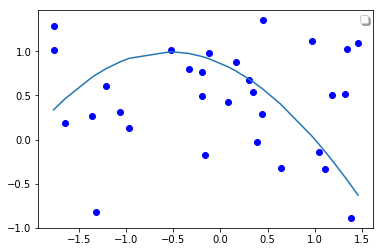

In [18]:
graph_plotter(X_1_poly_d4_scaled_coloumn_added,theta_1_d4,Y_1)

# 1-4. Fit the data using 16th order polynomial regression model (matrix form, gradient descent method).

In [19]:
X_1_poly_d16_scaled_coloumn_added = polynomial_adder(X_1,16)

## Optimized Weight - deg16

In [20]:
theta_1_d16 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,epochs=1000000)
print (theta_1_d16)

[[ 0.45269151]
 [ 0.7722609 ]
 [ 0.12119529]
 [-0.81910108]
 [-1.3383823 ]
 [-0.78793764]
 [ 0.58602271]
 [-0.21499428]
 [-0.06350163]
 [ 1.5354596 ]
 [ 1.72160859]
 [ 0.21985303]
 [-0.52896061]
 [ 0.18488835]
 [-0.93493415]
 [-0.43173151]
 [-0.4313412 ]]


## RMSE - Deg4

In [21]:
rms_1_d16 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16,Y_1)
print (rms_1_d16)

0.2623786428310596


## Graph_Deg 16

No handles with labels found to put in legend.


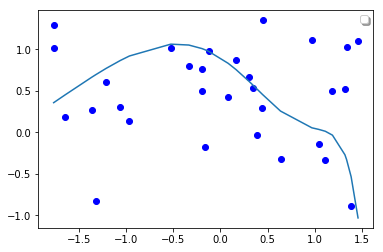

In [22]:
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16,Y_1)

# 1-5. Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization (matrix form, gradient descent method).
## You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10).

### λ = 0.1

#### Optimized weights λ = 0.1

In [23]:
theta_1_d16_regularised_1 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,regularisation_alpha=0.1)
print (theta_1_d16_regularised_1)

[[ 0.45118755]
 [ 0.78481591]
 [-0.41947298]
 [-0.64863125]
 [-0.4828538 ]
 [-0.22799224]
 [ 0.00627385]
 [ 0.17515824]
 [ 0.27501698]
 [ 0.31127663]
 [ 0.28925116]
 [ 0.22803818]
 [ 0.13100676]
 [ 0.00857716]
 [-0.12897922]
 [-0.27769236]
 [-0.43399934]]


#### RMSE - λ = 0.1

In [24]:
rms_1_d16_regularised_1 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_1,Y_1)
print (rms_1_d16_regularised_1)

0.26938556417504217


### λ = 1

#### Optimized weights λ = 1

In [25]:
theta_1_d16_regularised_2 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,regularisation_alpha=1)
print (theta_1_d16_regularised_2)

[[ 0.43808856]
 [ 0.30532714]
 [-0.11714469]
 [-0.21555533]
 [-0.18959658]
 [-0.12931817]
 [-0.06945018]
 [-0.02187918]
 [ 0.01069068]
 [ 0.02911397]
 [ 0.03545038]
 [ 0.03198174]
 [ 0.02082246]
 [ 0.00379041]
 [-0.01760999]
 [-0.04215991]
 [-0.06888419]]


#### RMSE - λ = 1


In [26]:
rms_1_d16_regularised_2 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_2,Y_1)
print (rms_1_d16_regularised_2)

0.3019080631123778


### λ = 10

#### Optimized weights λ = 10

In [27]:
theta_1_d16_regularised_3 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,regularisation_alpha=10)
print (theta_1_d16_regularised_3)

[[ 0.33951863]
 [ 0.05560105]
 [-0.02707079]
 [-0.0564417 ]
 [-0.06173571]
 [-0.05764355]
 [-0.05057775]
 [-0.04323712]
 [-0.03668487]
 [-0.03126116]
 [-0.02699188]
 [-0.02377544]
 [-0.02146823]
 [-0.01992273]
 [-0.01900323]
 [-0.01859114]
 [-0.01858551]]


#### RMSE - λ = 10

In [28]:
rms_1_d16_regularised_3 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_3,Y_1)
print (rms_1_d16_regularised_3)

0.3457512309710601


#### Graph Plot λ = 0.1,1,10

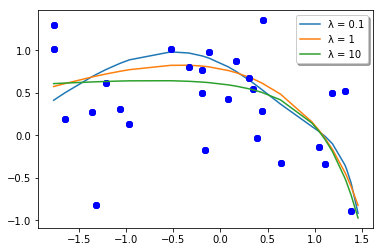

In [29]:
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_1,Y_1,graph_label="λ = 0.1")
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_2,Y_1,graph_label= "λ = 1")
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_3,Y_1,graph_label= "λ = 10")

# 1-6. Fit the data using 16th order polynomial regression model with scikit-learn Ridge model.
## You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10).

In [30]:
alpha = [0.1, 1, 10]

In [31]:
def ridge_optimized_weight(data,label,alpha=0.1):
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_mode1 = ridge_reg.fit(data[:,1:], label)
    print ("Model-Intercept",ridge_mode1.intercept_)
    print ("Model-Co-ef",ridge_mode1.coef_.T)
    return ridge_mode1

In [32]:
def ridge_lasso_graph_plotter(data,actual_label,ridge_model,graph_label=None):
    X_1_poly_dn_scaled_coloumn_added_sorted = data[data[:,1].argsort()]
    Y_ridge_mode1_1_predict = ridge_model.predict(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:])
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], actual_label, 'bo')
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], Y_ridge_mode1_1_predict,label=graph_label)
    legend = plt.legend(loc='upper right', shadow=True)

In [33]:
def ridge_lasso_rmse(data,actual_label,ridge_model):
    Y_ridge_mode1_1_predict = ridge_model.predict(data[:,1:])
    rms = sqrt(mean_squared_error(actual_label, Y_ridge_mode1_1_predict))
    return rms
    

#### Optimized_Weights ridge λ = 0.1

In [34]:
ridge_mode1_1 = ridge_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,0.1)

Model-Intercept [0.45269151]
Model-Co-ef [[ 0.78485691]
 [-0.41980483]
 [-0.6474652 ]
 [-0.48475686]
 [-0.22708056]
 [ 0.00646183]
 [ 0.17607267]
 [ 0.27503508]
 [ 0.30951311]
 [ 0.28986803]
 [ 0.22699526]
 [ 0.13087521]
 [ 0.01010497]
 [-0.12814542]
 [-0.27800671]
 [-0.43473061]]


#### RMSE ridge λ = 0.1

In [35]:
rms_ridge_1 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_1)
print(rms_ridge_1)

0.2693814634185468


#### Optimized Weights Ridge λ = 1

In [36]:
ridge_mode1_2 = ridge_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,1)

Model-Intercept [0.45269151]
Model-Co-ef [[ 0.30532714]
 [-0.11714469]
 [-0.21555533]
 [-0.18959658]
 [-0.12931817]
 [-0.06945018]
 [-0.02187918]
 [ 0.01069068]
 [ 0.02911397]
 [ 0.03545038]
 [ 0.03198174]
 [ 0.02082246]
 [ 0.00379041]
 [-0.01760999]
 [-0.04215991]
 [-0.06888419]]


#### RMSE ridge λ = 1


In [37]:
rms_ridge_2 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_2)
print(rms_ridge_2)

0.3015546921663988


#### Optimized Weights Ridge λ = 10

In [38]:
ridge_mode1_3 = ridge_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,10)

Model-Intercept [0.45269151]
Model-Co-ef [[ 0.05560105]
 [-0.02707079]
 [-0.0564417 ]
 [-0.06173571]
 [-0.05764355]
 [-0.05057775]
 [-0.04323712]
 [-0.03668487]
 [-0.03126116]
 [-0.02699188]
 [-0.02377544]
 [-0.02146823]
 [-0.01992273]
 [-0.01900323]
 [-0.01859114]
 [-0.01858551]]


#### RMSE ridge λ = 10

In [39]:
rms_ridge_3 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_3)
print(rms_ridge_3)

0.3267044743318329


#### Graph Plot Ridge λ = 0.1,1,10


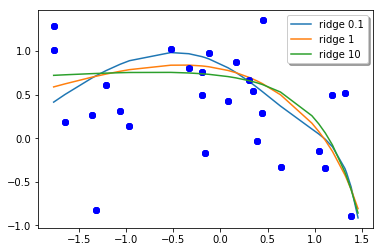

In [40]:
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_1,graph_label="ridge 0.1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_2,graph_label="ridge 1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_3,graph_label="ridge 10")

## 1-7. Fit the data using 16th order polynomial regression model with scikit-learn Lasso model.

In [41]:
def lasso_optimized_weight(data,label,alpha=0.1):
    lasso_reg = Lasso(alpha)
    lasso_mode1 = lasso_reg.fit(data[:,1:], label)
    print ("Model-Intercept",lasso_mode1.intercept_)
    print ("Model-Co-ef",lasso_mode1.coef_.T)
    return lasso_mode1

#### Optimized_Weights lasso λ = 0.1


In [42]:
lasso_mode1_1 = lasso_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,0.1)

Model-Intercept [0.45269151]
Model-Co-ef [-0.         -0.         -0.         -0.         -0.         -0.37373874
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


#### RMSE lasso λ = 0.1

In [43]:
rms_lasso_1 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_1)
print(rms_lasso_1)

0.34466712593964577


#### Optimized_Weights lasso λ = 1

In [44]:
lasso_mode1_2 = lasso_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,1)

Model-Intercept [0.45269151]
Model-Co-ef [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


#### RMSE lasso λ = 1

In [45]:
rms_lasso_2 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_2)
print(rms_lasso_2)

0.5772554182087681


#### Optimized_Weights lasso λ = 10

In [46]:
lasso_mode1_3 = lasso_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,10)

Model-Intercept [0.45269151]
Model-Co-ef [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


#### RMSE lasso λ = 10

In [47]:
rms_lasso_3 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_3)
print(rms_lasso_3)

0.5772554182087681


#### Graph Plot Lasso λ = 0.1,1,10


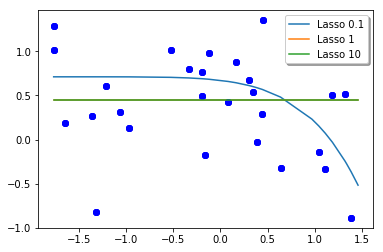

In [48]:
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_1,graph_label="Lasso 0.1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_2,graph_label="Lasso 1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_3,graph_label="Lasso 10")

## 2.Polynomial regression with train/validation/test
### You need to split the data into training/validation/testing data set as 60% / 20% / 20%.
### Please use np.random.seed(1) to have consistent data for evaluation


### 2-1. Fit the data using linear (1st order) regression model (matrix form, gradient descent method).

In [49]:
# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
#         val_errors.append(mean_squared_error(y_val_predict, y_val))
#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
# lin_reg = LinearRegression()
# plot_learning_curves(lin_reg, X, y)
    
# from sklearn.pipeline import Pipeline

# polynomial_regression = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#         ("lin_reg", LinearRegression()),
#     ])

# plot_learning_curves(polynomial_regression, X, y)

In [174]:
data2 = pd.read_csv("ex2data2.csv")
X_2 = data2.as_matrix(columns=data1.columns[0:1])
Y_2 = data2.as_matrix(columns=data1.columns[1:])
X_2_coloumn_added = np.c_[np.ones((data2.shape[0], 1)), X_2]


In [175]:
data2.shape

(5404, 2)

In [177]:
X_2_train_val, X_2_test, y_2_train_val, y_2_test = train_test_split(X_2_coloumn_added , Y_2, test_size=0.2,random_state=1)
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2_train_val, y_2_train_val, test_size=0.25,random_state=1)
print (X_2_coloumn_added.shape)
print (X_2_train_val.shape)
print (X_2_train.shape)

(5404, 2)
(4323, 2)
(3242, 2)


In [164]:
def Mean_Square_Error_calculator(data,weights,actual_label):
    predict_y = data.dot(weights)
    rms = mean_squared_error(actual_label, predict_y)
    return rms

In [181]:
def train_val_best_model(X_1_train, X_1_val, y_1_train, y_1_val,degree):
    epochs = [10000]
    learning_rate = [.01]
    train_errors, val_errors = [], []
    counter = 1
    combination = {}
    for epoch in epochs:
        for rate in learning_rate:
            weights = weight_optimizer(X_1_train,degree,y_1_train,learn_rate = rate,epochs = epoch,regularisation_alpha=0)
            rmse_train = rmse_calculator(X_1_train,weights,y_1_train)
            rmse_val = rmse_calculator(X_1_val,weights,y_1_val)
            train_errors.append(rmse_train)
            val_errors.append(rmse_val)
            combination[counter] = (epoch,rate)
            counter += 1
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print(best_model)
    return best_model


In [182]:
best_model = train_val_best_model(X_2_train, X_2_val, y_2_train, y_2_val,1)
weights_best_model = weight_optimizer(X_2_train,1,y_2_train,learn_rate = best_model[1],epochs = best_model[0],regularisation_alpha=0)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### RMSE - Train,test Deg -1

In [167]:
rmse_train = rmse_calculator(X_2_train,weights_best_model,y_2_train)
rmse_test = rmse_calculator(X_2_test,weights_best_model,y_2_test)
print("rmse_train",rmse_train)
print("rmse_test",rmse_test)

rmse_train 0.5451525266511789
rmse_test 0.5391290008187478


#### Graph Train Deg-1

No handles with labels found to put in legend.


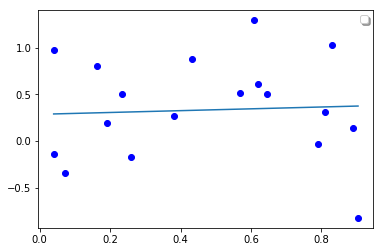

In [169]:
graph_plotter(X_2_train,weights_best_model,y_2_train,graph_label=None)

## 2-2. Fit the data using 2nd order polynomial regression model (matrix form, gradient descent method).

In [113]:
X_2_train_val, X_2_test, y_2_train_val, y_2_test = train_test_split(X_1_poly_d2_scaled_coloumn_added, Y_1, test_size=0.2,random_state=1)
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2_train_val, y_2_train_val, test_size=0.25,random_state=1)

(10000, 0.1)


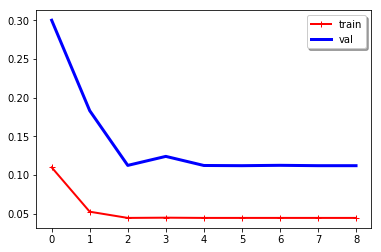

In [114]:
best_model_2 = train_val_best_model(X_2_train, X_2_val, y_2_train, y_2_val,2)
weights_best_model_2 = weight_optimizer(X_2_train,2,y_2_train,learn_rate = best_model_2 [1],epochs = best_model_2 [0],regularisation_alpha=0)

#### RMSE - Train,test Deg -2

In [115]:
rmse_train_2 = rmse_calculator(X_2_train,weights_best_model_2,y_2_train)
rmse_test_2 = rmse_calculator(X_2_test,weights_best_model_2,y_2_test)
print("rmse_train",rmse_train_2)
print("rmse_test",rmse_test_2)

rmse_train 0.211396286675897
rmse_test 0.4818349795838404


#### Graph Train Deg-2

No handles with labels found to put in legend.


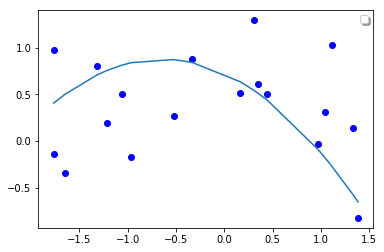

In [116]:
graph_plotter(X_2_train,weights_best_model_2,y_2_train,graph_label=None)

## 2-3. Fit the data using 4th order polynomial regression model (matrix form, gradient descent method).

In [140]:
X_4_train_val, X_4_test, y_4_train_val, y_4_test = train_test_split(X_1_poly_d4_scaled_coloumn_added, Y_1, test_size=0.2,random_state=1)
X_4_train, X_4_val, y_4_train, y_4_val = train_test_split(X_4_train_val, y_4_train_val, test_size=0.25,random_state=1)

(10000, 0.01)


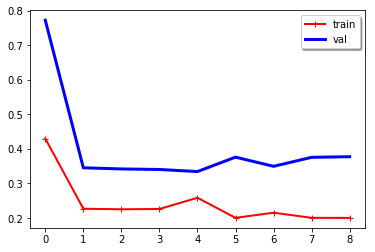

In [141]:
best_model_4 = train_val_best_model(X_4_train, X_4_val, y_4_train, y_4_val,4)
weights_best_model_4 = weight_optimizer(X_4_train,4,y_4_train,learn_rate = best_model_4 [1],epochs = best_model_4 [0],regularisation_alpha=0)

#### RMSE - Train,test Deg -4

In [142]:
rmse_train_4 = rmse_calculator(X_4_train,weights_best_model_4,y_4_train)
rmse_test_4 = rmse_calculator(X_4_test,weights_best_model_4,y_4_test)
print("rmse_train",rmse_train_4)
print("rmse_test",rmse_test_4)

rmse_train 0.20310265799692462
rmse_test 0.4811868089582346


No handles with labels found to put in legend.


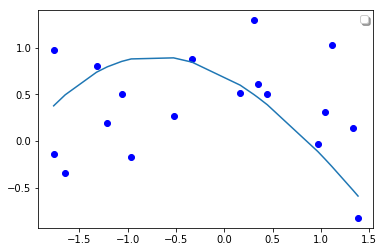

In [143]:
graph_plotter(X_4_train,weights_best_model_4,y_4_train,graph_label=None)

## 2-4. Fit the data using 16th order polynomial regression model (matrix form, gradient descent method).

In [121]:
X_16_train_val, X_16_test, y_16_train_val, y_16_test = train_test_split(X_1_poly_d16_scaled_coloumn_added, Y_1, test_size=0.2,random_state=1)
X_16_train, X_16_val, y_16_train, y_16_val = train_test_split(X_16_train_val, y_16_train_val, test_size=0.25,random_state=1)

#### Train_validation_causes_error !!!

In [ ]:
best_model_16 = train_val_best_model(X_16_train, X_16_val, y_16_train, y_16_val,16)
weights_best_model_16 = weight_optimizer(X_16_train,16,y_16_train,learn_rate = best_model_16 [1],epochs = best_model_16 [0],regularisation_alpha=0)

## 2-5. Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization.

In [148]:
def train_val_best_model_ridge(X_1_train, X_1_val, y_1_train, y_1_val,degree):
    epochs = [10000]
    learning_rate = [.01]
    regularisation_alpa = [0.1] 
    train_errors, val_errors = [], []
    counter = 1
    combination = {}
    for epoch in epochs:
        for rate in learning_rate:
            for alpha in regularisation_alpa:
                weights = weight_optimizer(X_1_train,degree,y_1_train,learn_rate = rate,epochs = epoch, \
                                           regularisation_alpha=alpha)
                rmse_train = rmse_calculator(X_1_train,weights,y_1_train)
                rmse_val = rmse_calculator(X_1_val,weights,y_1_val)
                train_errors.append(rmse_train)
                val_errors.append(rmse_val)
                combination[counter] = (epoch,rate,alpha)
                counter += 1
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print(best_model)
    return best_model

In [ ]:
best_model_16_ridge = train_val_best_model(X_16_train, X_16_val, y_16_train, y_16_val,16)
weights_best_model_16_ridge = weight_optimizer(X_16_train,16,y_16_train,learn_rate = best_model_16_ridge [1],epochs = best_model_16_ridge [0],regularisation_alpha=best_model_16_ridge [2])